In [1]:
import numpy as np

In [2]:
from qiskit import QuantumCircuit

In [3]:
from qiskit import Aer

In [4]:
from qiskit.tools.visualization import plot_histogram, plot_state_city

In [5]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [6]:
simulator=Aer.get_backend('aer_simulator')

In [7]:
from qiskit.circuit.random import random_circuit

In [8]:
qc=[random_circuit(num_qubits=3, depth=4, measure=True) for _ in range(1,11)]

In [9]:
from qiskit import transpile

In [10]:
qc=transpile(qc, simulator)

In [11]:
result=simulator.run(qc).result()

In [12]:
counts=result.get_counts(qc[0])

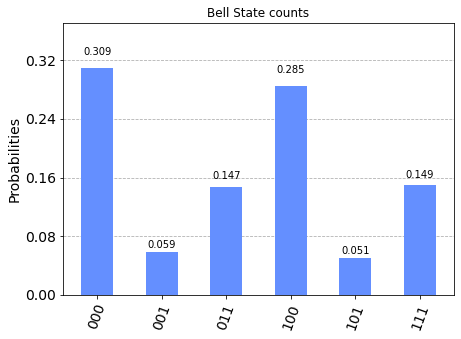

In [13]:
plot_histogram(counts, title="Bell State counts");

In [14]:
######################################################################################################

In [15]:
from dask_kubernetes import KubeCluster

In [16]:
!cat ./worker-spec.yml

# worker-spec.yml

kind: Pod
metadata:
  labels:
    foo: bar
spec:
  restartPolicy: Never
  containers:
  - image: daskdev/dask:latest
    imagePullPolicy: IfNotPresent
    args: [dask-worker, --nthreads, '1', --no-dashboard, --memory-limit, 1G, --death-timeout, '60']
    name: dask
    env:
      - name: EXTRA_PIP_PACKAGES
        value: git+https://github.com/dask/distributed
    resources:
      limits:
        cpu: "1"
        memory: 1G
      requests:
        cpu: "1"
        memory: 1G


In [17]:
cluster_kube = KubeCluster('worker-spec.yml')

Creating scheduler pod on cluster. This may take some time.
Forwarding from 127.0.0.1:51204 -> 8786
Forwarding from [::1]:51204 -> 8786
Handling connection for 51204
Handling connection for 51204
Handling connection for 51204


/home/red/.local/lib/python3.9/site-packages/distributed/client.py:1100: VersionMismatchWarning: Mismatched versions found

+-------------+-----------+------------------------+---------+
| Package     | client    | scheduler              | workers |
+-------------+-----------+------------------------+---------+
| blosc       | None      | 1.10.2                 | None    |
| cloudpickle | 2.0.0     | 1.6.0                  | None    |
| distributed | 2021.09.0 | 2021.09.0+16.g3f86e58f | None    |
| lz4         | None      | 3.1.3                  | None    |
+-------------+-----------+------------------------+---------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


In [18]:
cluster_kube.get_logs()

Handling connection for 51204


{'Cluster': 'Creating scheduler pod on cluster. This may take some time.',
 'Scheduler': 'distributed.scheduler - INFO - -----------------------------------------------\ndistributed.scheduler - INFO - Clear task state\ndistributed.scheduler - INFO -   Scheduler at:     tcp://172.17.0.3:8786\ndistributed.scheduler - INFO -   dashboard at:                     :8787\ndistributed.scheduler - INFO - Receive client connection: Client-a754d693-15a5-11ec-9eff-a09f10d41eae\ndistributed.scheduler - INFO - Remove client Client-a754d693-15a5-11ec-9eff-a09f10d41eae\ndistributed.scheduler - INFO - Remove client Client-a754d693-15a5-11ec-9eff-a09f10d41eae\ndistributed.scheduler - INFO - Close client connection: Client-a754d693-15a5-11ec-9eff-a09f10d41eae'}

In [ ]:
####   It dosen't run after this so moving on to next ways of running Aer

In [ ]:
from dask.distributed import Client

In [ ]:
client_kube = Client(cluster_kube)

In [ ]:
qbackend = Aer.get_backend('qasm_simulator')

In [ ]:
from qiskit import execute

In [ ]:
result_ideal = execute(qc, qbackend, executor=client_kube).result()

In [ ]:
client_kube.close()

In [ ]:
cluster_kube.close()

In [ ]:
##################################################################################################

In [19]:
from concurrent.futures import ThreadPoolExecutor

In [20]:
exc_threadpool = ThreadPoolExecutor(max_workers=2)

In [21]:
exc_threadpool

In [22]:
qbackend = Aer.get_backend('qasm_simulator')

In [23]:
from qiskit import execute

In [24]:
result_ideal = execute(qc, qbackend, executor=exc_threadpool).result()

ERROR: Failed to load qobj: to_json not implemented for this type of object: <class 'concurrent.futures.thread.ThreadPoolExecutor'>


In [ ]:
##################################################################################################

In [25]:
from dask.distributed import Client

In [26]:
from dask.distributed import LocalCluster

In [27]:
local_cluster_1=LocalCluster(n_workers=1, processes=True)

In [28]:
local_cluster_1

In [29]:
client_localcluster = Client(address=local_cluster_1)

In [30]:
client_localcluster

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 1
Total threads: 16,Total memory: 7.70 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36699,Workers: 1
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 7.70 GiB
Comm: tcp://192.168.43.239:32991,Total threads: 16
Dashboard: http://192.168.43.239:34421/status,Memory: 7.70 GiB
Nanny: tcp://127.0.0.1:41481,


In [31]:
qbackend = Aer.get_backend('qasm_simulator')

In [32]:
from qiskit import execute

In [33]:
result_ideal = execute(qc, qbackend, executor=client_localcluster).result()

ERROR: Failed to load qobj: to_json not implemented for this type of object: <class 'distributed.client.Client'>


In [34]:
local_cluster_1.close()

In [35]:
client_localcluster.close()

In [ ]:
##################################################################################################

In [36]:
from dask.distributed import Client

In [37]:
exc=Client(n_workers=2, threads_per_worker=1, memory_limit='500MB')

In [38]:
qbackend = Aer.get_backend('qasm_simulator')

In [39]:
from qiskit import execute

In [40]:
result_ideal = execute(qc, qbackend, executor=exc).result()

ERROR: Failed to load qobj: to_json not implemented for this type of object: <class 'distributed.client.Client'>


In [41]:
exc.close()